In [1]:
!nvidia-smi

Fri Aug 25 12:45:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -qU transformers
!pip install -qU hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.5/367.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 25.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.1

In [4]:
# Load dataset
!git clone https://github.com/aghasemi/ChronologicalPersianPoetryDataset.git poems

Cloning into 'poems'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 39 (delta 2), reused 0 (delta 0), pack-reused 33
Receiving objects: 100% (39/39), 34.27 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (8/8), done.


In [5]:
import json
import os
import glob

import numpy as np
import pandas as pd

from tqdm import tqdm

In [6]:
df = pd.read_csv("/content/poems/poems.tsv", sep="\t")


df["text"] = df["poet"] + "<|startoftext|>" + df["poem"].apply(lambda t: t.replace("    ", "<sep>").replace("\t", "<sep>"))
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,poet,century,poem,text
0,رودکی,3,گر من این دوستی تو ببرم تا لب گور بزنم نعره...,رودکی<|startoftext|>گر من این دوستی تو ببرم تا...
1,رودکی,3,به حق نالم ز هجر دوست زارا سحرگاهان چو بر گ...,رودکی<|startoftext|>به حق نالم ز هجر دوست زارا...
2,رودکی,3,به نام نیک تو، خواجه، فریفته نشوم که نام نی...,رودکی<|startoftext|>به نام نیک تو، خواجه، فریف...
3,رودکی,3,دلا، تا کی همی جویی منی را؟ چه داری دوست هر...,رودکی<|startoftext|>دلا، تا کی همی جویی منی را...
4,رودکی,3,گرفت خواهم زلفین عنبرین ترا به بوسه نقش‌کنم...,رودکی<|startoftext|>گرفت خواهم زلفین عنبرین تر...


In [7]:
poets = list(df["poet"].unique())

In [8]:
idx = np.random.randint(0, len(df))
print(idx)
print(df.iloc[idx]["poet"])
print(df.iloc[idx]["poem"])
print(df.iloc[idx]["text"])

5101
عطار
یافتند آن بت که نامش بود لات    لشگر محمود اندر سومنات    هندوان از بهر بت برخاستند    ده رهش هم سنگ زر می‌خواستند    هیچ گونه شاه می‌نفروختش    آتشی برکرد و حالی سوختش    سرکشی گفتش نمی‌بایست سوخت    زر به از بت، می‌ببایستش فروخت    گفت ترسیدم که در روز شمار    بر سر آن جمع گوید کردگار    آزر و محمود را دارید گوش    زانک هست آن بت تراش این بت فروش    گفت چون محمود آتش برفروخت    وآن بت آتش پرستان را بسوخت    بیست من جوهر بیامد از میانش    خواست شد از دست حالی رایگانش    شاه گفتا لایق لات این بود    وز خدای من مکافات این بود    بشکن آن بتها که داری سر به سر    تا چو بت در پا نه افتی در به در    نفس چون بت را بسوز از شوق دوست    تا بسی جوهر فرو ریزد ز پوست    چون به گوش جان شنیدستی الست    از بلی گفتن مکن کوتاه دست    بسته‌ای عهد الست از پیش تو    از بلی سر درمکش زین بیش تو    چون بدو اقرار آوردی درست    کی شود انکارآن کردی درست    ای به اول کرده اقرار الست    پس به آخر کرده انکار الست    چون در اول بسته‌ای میثاق تو    چون توانی شد در آخر عاق تو    ناگزیرت اوست، پس با او بساز 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54524 entries, 0 to 54523
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   poet     54524 non-null  object
 1   century  54524 non-null  int64 
 2   poem     54524 non-null  object
 3   text     54524 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
import pandas as pd
import numpy as np

from pathlib import Path

import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelWithLMHead
from transformers import AutoTokenizer, GPT2LMHeadModel, GPT2Config

from IPython import display

In [11]:
model_name_or_path = "HooshvareLab/gpt2-fa"

tokenizer = AutoTokenizer.from_pretrained(
    model_name_or_path,
    bos_token='<s>',
    eos_token='</s>',
    pad_token='<pad>',
    unk_token='<unk>'
)
tokenizer.add_special_tokens({
    "bos_token": '</s>',
    "eos_token": '</s>',
    "pad_token": '<pad>',
    "unk_token": '<unk>'
})

config = AutoConfig.from_pretrained(
    model_name_or_path,
    bos_token_id=tokenizer("<s>")["input_ids"][0],
    eos_token_id=tokenizer("</s>")["input_ids"][0],
    pad_token_id=tokenizer("<pad>")["input_ids"][0],
    unk_token_id=tokenizer("<unk>")["input_ids"][0],
)

tokenizer.save_pretrained("/content/gpt2/")
config.save_pretrained("/content/gpt2/")

!wget "https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/pytorch_model.bin" -P /content/gpt2/
!wget "https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/tokenizer.json" -P /content/gpt2/

--2023-08-25 12:46:40--  https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/pytorch_model.bin
Resolving huggingface.co (huggingface.co)... 18.161.135.49, 18.161.135.112, 18.161.135.71, ...
Connecting to huggingface.co (huggingface.co)|18.161.135.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/HooshvareLab/gpt2-fa/46b0b806c740a0f0a9f056f5574c5fa896166fe844945fd3c849bf34365e5060?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1693226800&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MzIyNjgwMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9Ib29zaHZhcmVMYWIvZ3B0Mi1mYS80NmIwYjgwNmM3NDBhMGYwYTlmMDU2ZjU1NzRjNWZhODk2MTY2ZmU4NDQ5NDVmZDNjODQ5YmYzNDM2NWU1MDYwP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&

In [12]:
tokenizer = AutoTokenizer.from_pretrained(
    "/content/gpt2",
    bos_token='<s>',
    eos_token='</s>',
    pad_token='<pad>'
)

print(tokenizer.encode("سلام بر شما"))
print(tokenizer.encode("<s>"))
print(tokenizer.encode("</s>"))
print(tokenizer.encode("<pad>"))
print(tokenizer.encode("<|startoftext|>"))
print(tokenizer.encode("<sep>"))

[8906, 327, 512]
[0]
[2]
[1]
[6]
[9]


In [13]:
texts = df["text"].values.tolist()

print(len(texts))

54524


In [14]:
# Due to the limited resources and for the sake of simplicity
# Set to 256
max_seq = 256

In [15]:
from torch.utils.data import Dataset  # this is the pytorch class import
import torch
torch.manual_seed(42)


class MTGDataset(Dataset):

    def __init__(self, txt_list, tokenizer, max_length=1024):

        self.tokenizer = tokenizer  # the gpt2 tokenizer we instantiated
        self.input_ids = []
        self.attn_masks = []

        for txt in txt_list:
            """
            This loop will iterate through each entry in the flavour text corpus.
            For each bit of text it will prepend it with the start of text token,
            then append the end of text token and pad to the maximum length with the
            pad token.
            """

            encodings_dict = tokenizer('<s>' + txt + '</s>',
                                       truncation=True,
                                       max_length=max_length,
                                       padding="max_length")

            """
            Each iteration then appends either the encoded tensor to a list,
            or the attention mask for that encoding to a list. The attention mask is
            a binary list of 1's or 0's which determine whether the langauge model
            should take that token into consideration or not.
            """
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [16]:
from torch.utils.data import random_split

dataset = MTGDataset(texts, tokenizer, max_length=max_seq)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {len(train_dataset)} samples for training, and {len(val_dataset)} samples for validation testing'

'There are 49071 samples for training, and 5453 samples for validation testing'

In [17]:
print(train_dataset[0][0][:100])
print(tokenizer.decode(train_dataset[0][0][:100]))

tensor([    0,  5756,   361,     6,  2076,  3800,   358,   336,  5307,   521,
          285,   727,   274,   293,   327, 11800,     9,  1061,   295,   621,
          293, 17312,  1691,   488,   627,  2008,   274,     9,   402,   488,
        25136,   314,   656,   293, 15018,  5790,   274,     9,   481,  3573,
        10358, 11810,   298, 27492,   274,   293,   298,   351,  5307,     9,
          378,  5274, 10352,   336,  4705,   310,   619,   323,   610,   521,
          285, 29651,   832,     9,   286, 10559,   610,   310, 16820,  1350,
        20836,   293,  1851,   274,     9,  4713,  2066,   716,  3800,   358,
         1546,   391,   788,  5875,     9,   751,  3981,   358,  1546,   274,
          716,  1859,   352,   293,  2066,   419,  5307,     9, 19003, 13494])
<s>مولوی<|startoftext|>تا عاشق آن یارم بی‌کارم و بر کارم<sep>سرگشته و پابرجا ماننده پرگارم<sep>ماننده مریخی با ماه و فلک خشمم<sep>وز چرخ کله زرین در ننگم و در عارم<sep>گر خویش منی یارا می بین که چه بی‌خویشم<sep>ز اسرار 

In [18]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=8
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=8
)

In [19]:
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np

# Loading the model configuration and setting it to the GPT2 standard settings.
configuration = GPT2Config.from_pretrained('./gpt2', output_hidden_states=False)

# Create the instance of the model and set the token size embedding length
model = GPT2LMHeadModel.from_pretrained("./gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# This step is optional but will enable reproducible runs.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 42001. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [20]:
epochs = 3
warmup_steps = 1e2
sample_every = 300

In [21]:
from transformers import AdamW

# AdamW is a class from the huggingface library, it is the optimizer we will be using, and we will only be instantiating it with the default parameters.
optimizer = AdamW(
    model.parameters(),
    lr=5e-4,
    eps=1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [22]:
from transformers import get_linear_schedule_with_warmup

"""
Total training steps is the number of data points, times the number of epochs.
Essentially, epochs are training cycles, how many times each point will be seen by the model.
"""

total_steps = len(train_dataloader) * epochs

"""
We can set a variable learning rate which will help scan larger areas of the
problem space at higher LR earlier, then fine tune to find the exact model minima
at lower LR later in training.
"""
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps)


In [23]:
sample_poet = poets[np.random.randint(0, len(poets))]
sample_input = f"<s>{sample_poet}<|startoftext|>"
print(sample_input)
sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"])
sample_input_ids = sample_input_ids.to(device)

sample_outputs = model.generate(
    input_ids=sample_input_ids,
    # bos_token_id=random.randint(1, len(tokenizer.get_vocab())),
    do_sample=True,
    top_k=50,
    max_length=50,
    top_p=0.95,
    num_return_sequences=1
)
for i, sample_output in enumerate(sample_outputs):
    gen_sample_output = tokenizer.decode(sample_output, skip_special_tokens=False)
    gen_sample_output = gen_sample_output.replace("<|startoftext|>", "\n")
    gen_sample_output = gen_sample_output.replace("<s>", "")
    gen_sample_output = gen_sample_output.replace("</s>", "")
    gen_sample_output = gen_sample_output.replace("<sep>", "\n")

    print(f'Example output: {gen_sample_output}')

<s>رهی معیری<|startoftext|>
Example output: رهی معیری
ک و دهر و ذلیل الله تعالی فرجهم تعالی فرجهم فیه و بالذلک بصیران و بالذلک منون فیهم و بالذلک و بالذلک بالذ


In [ ]:
import random
import time
import datetime
from tqdm import tqdm


def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))


total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in tqdm(range(0, epochs), position=0):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), position=0):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()

        outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks, token_type_ids=None)

        loss = outputs[0]

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print()
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_poet = poets[np.random.randint(0, len(poets))]
            sample_input = f"<s>{sample_poet}<|startoftext|>"
            sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"])
            sample_input_ids = sample_input_ids.to(device)

            sample_outputs = model.generate(
                input_ids=sample_input_ids,
                # bos_token_id=random.randint(1, len(tokenizer.get_vocab())),
                do_sample=True,
                top_k=50,
                max_length=50,
                top_p=0.95,
                num_return_sequences=1
            )
            for i, sample_output in enumerate(sample_outputs):
                gen_sample_output = tokenizer.decode(sample_output, skip_special_tokens=False)
                gen_sample_output = gen_sample_output.replace("<|startoftext|>", "\n")
                gen_sample_output = gen_sample_output.replace("<s>", "")
                gen_sample_output = gen_sample_output.replace("</s>", "")
                gen_sample_output = gen_sample_output.replace("<sep>", "\n")

                print(f'Example output: {gen_sample_output}')

            model.train()

        loss.backward()
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print()
    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')
    print()

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in tqdm(validation_dataloader, total=len(validation_dataloader), position=0):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():

            outputs = model(b_input_ids, attention_mask=b_masks, labels=b_labels)

            loss = outputs[0]

        batch_loss = loss.item()
        total_eval_loss += batch_loss

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)

    print()
    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')
    print()

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

  0%|          | 0/3 [00:00<?, ?it/s]

Beginning epoch 1 of 3


  5%|▍         | 300/6134 [02:50<56:58,  1.71it/s]


Batch 300 of 6134. Loss:3.2681474685668945. Time:0:02:51
Example output: عطار
همچو ما را در دل من مُلک عجز
یک شب به شبگیر باده گفتا ای دوست
به پیش آن که از دیده می بینم
به تو که از درد و درد و درد من


 10%|▉         | 600/6134 [05:47<54:07,  1.70it/s]


Batch 600 of 6134. Loss:4.370228290557861. Time:0:05:48
Example output: مهدی اخوان ثالث
می که در کنار این دیوارِ گلرخان
می‌لرزد از آتش سوزانِ دشتِ من!
از آن سو که می‌بایدم ز خاکِ چمنِ یاسمن


 15%|█▍        | 900/6134 [08:44<51:13,  1.70it/s]


Batch 900 of 6134. Loss:2.7052552700042725. Time:0:08:45
Example output: مهستی گنجوی
بهر کجا گنج از این و آن است
بر سر گنج ز چهست و گنج نیست
در گنج سر گنج بی‌همت نیست
در گنج ز چهست گنج و گنج نیست
بر هیچ در نیست


 20%|█▉        | 1200/6134 [11:41<48:26,  1.70it/s]


Batch 1200 of 6134. Loss:1.9349133968353271. Time:0:11:42
Example output: سعدی
چشم من از چشم مستست از من جدا، دور کرد
دست من با زلف من آن چشم به نور گفت
دل در پی آن زلف ترا در بر بست
جان و دل به پای در بر درت نهادند



 24%|██▍       | 1500/6134 [14:38<45:19,  1.70it/s]


Batch 1500 of 6134. Loss:3.1442954540252686. Time:0:14:39
Example output: کسایی
در دست عشق تو دل را به غم باز داد
در پای عشق تو این تنباز داد
تا دل تو بر آب داد
یک روز به غم تو جان داد


 29%|██▉       | 1800/6134 [17:34<42:22,  1.70it/s]


Batch 1800 of 6134. Loss:2.9282174110412598. Time:0:17:35
Example output: باباافضل کاشانی
از میان تو، دل با تو، تا که شود خاموش
ای دل من، در آن حلقه، چون سزید خاموش


 34%|███▍      | 2100/6134 [20:31<39:29,  1.70it/s]


Batch 2100 of 6134. Loss:2.7232723236083984. Time:0:20:32
Example output: اقبال لاهوری
ز درد جهان بگریخت بی تو
عالم همه بود و بود هم تو
ز چشم تر و خشک او
سنان گل همه ازو بود


 39%|███▉      | 2400/6134 [23:28<36:33,  1.70it/s]


Batch 2400 of 6134. Loss:3.1245639324188232. Time:0:23:29
Example output: فردوسی
چنان دید تنگدل بیدار
چو بشناخت آن راز ازیشان
چو گردون همی دید تنگدل
جهان را خبر دید تنگدل
ز هر دو دیده در جنگ و جنگ
که جنگ اندر خور او بود جنگ



 44%|████▍     | 2700/6134 [26:25<33:48,  1.69it/s]


Batch 2700 of 6134. Loss:2.789297103881836. Time:0:26:26
Example output: شیخ محمود شبستری
گفت «ای صبا تو به صد هزاران بار
یک بار ز تن خود ز جهان و دو صد هزار بار
جان تو از همه جهان به جهان در است
از عمر خود جدا نیست و صد بار
گر به


 49%|████▉     | 3000/6134 [29:23<30:44,  1.70it/s]


Batch 3000 of 6134. Loss:2.923368215560913. Time:0:29:23
Example output: محتشم کاشانی
به جان و دلم به چه امید چه خوش باد بهاری
چو از سر جان رفت جان من از سر من چه گلستانی
به جان من تازه و تازه‌ام تازه و تازه تازه به هر چه بینم
ح


 54%|█████▍    | 3300/6134 [32:20<27:56,  1.69it/s]


Batch 3300 of 6134. Loss:2.470029354095459. Time:0:32:21
Example output: فردوسی
چو بدیشان رسید از شاه بفرمود
ز سرفراز و کلاه برکشیدند
چو بشنید شه را گفت این سخن چه باشد
که بد از پرده و پرده برکشید
بی‌گناه از سرش برخاستست



 59%|█████▊    | 3600/6134 [35:17<24:44,  1.71it/s]


Batch 3600 of 6134. Loss:2.368462562561035. Time:0:35:18
Example output: کامبیز صدیقی کسمایی
من نمی خواهم که می خواهم که



 □













 □



 □



  


 64%|██████▎   | 3900/6134 [38:14<21:52,  1.70it/s]


Batch 3900 of 6134. Loss:2.0621414184570312. Time:0:38:15
Example output: سیمین بهبهانی
یارب که بوسه خواهم لب تو را بوسه کن
ای که بر رخ تو بوسه خواهم بوسه کن
روی تو آینه ها در نظر من ببین
بر رخ تو آینه ها بوسه کن


 68%|██████▊   | 4200/6134 [41:11<18:55,  1.70it/s]


Batch 4200 of 6134. Loss:1.4938693046569824. Time:0:41:12
Example output: مهستی گنجوی
بر آستان شاه را بر در دیرم
وز آستان او بی سر و پا بر در دیرم
گرت کردم از راه عشق در سرِ امید
بر آستان دل چون در دیرم
همت دادم


 73%|███████▎  | 4500/6134 [44:08<16:05,  1.69it/s]


Batch 4500 of 6134. Loss:2.1552205085754395. Time:0:44:09
Example output: سلمان ساوجی
تا آن غم به دست آن دل غم اندوخته‌ای
 دل را به دست خویش آورده‌ای
 جز عشق رخت بر سر دلدار مگذار
 ور عقل در دل این غم اندوخته‌ای
 زان دل به


 78%|███████▊  | 4800/6134 [47:05<13:06,  1.70it/s]


Batch 4800 of 6134. Loss:3.0207691192626953. Time:0:47:06
Example output: سهراب سپهری
در دل شب
هر جا که
در باغ‌ها
در گوش‌ها
در من می نگری.
در هر دم
در آخرین گل‌های کوچک و شب
تا من به باغ بازآیم



 83%|████████▎ | 5100/6134 [50:03<10:10,  1.69it/s]


Batch 5100 of 6134. Loss:1.9690816402435303. Time:0:50:03
Example output: باباافضل کاشانی
ای عشق، در پی آن جهانم
وز غم، دل به غمش نشانم
تا تو به این کمند تن چه کنی
کی می رسی ز نفس نشانم


 88%|████████▊ | 5400/6134 [53:00<07:12,  1.70it/s]


Batch 5400 of 6134. Loss:2.127013683319092. Time:0:53:01
Example output: پروین اعتصامی
ای بر تو هر چه مراست، ای دوست
وز وی دو دست و جفا تو دست
در کام و لب و کام چه می‌لرزی
وین نیز همین بود و بود، ای دوست


 93%|█████████▎| 5700/6134 [55:57<04:14,  1.71it/s]


Batch 5700 of 6134. Loss:1.3729209899902344. Time:0:55:58
Example output: فروغ فرخزاد
آن را که من دیدم ، من من ، می دیدم که می بودم
 او را به من همره ، من را به من می دیدم
 با من و آن یار من ، من را ، با من ، می دیدم که


 98%|█████████▊| 6000/6134 [58:54<01:19,  1.70it/s]


Batch 6000 of 6134. Loss:2.0732967853546143. Time:0:58:55
Example output: صائب تبریزی
تا ز رخسار ترا دل روشن روشن کرد
تا به یک ساعت حجاب من روشن شود
با چنین رویی سزاوار آتش نبود
دیده چون پاک شود روزن روشنگر
چون نجوشد مرا از دیده بینا به نظر
م


100%|██████████| 6134/6134 [1:00:14<00:00,  1.70it/s]



Average Training Loss: 2.622470045045023. Epoch time: 1:00:14



 33%|███▎      | 1/3 [1:02:31<2:05:03, 3751.58s/it]


Validation loss: 2.321332848316763. Validation Time: 0:02:17

Beginning epoch 2 of 3


  5%|▍         | 300/6134 [02:56<57:17,  1.70it/s]


Batch 300 of 6134. Loss:1.3634799718856812. Time:0:02:57
Example output: سیمین بهبهانی
می ز آن میگون چو می ای به ساغر می ریزم
خویش را چون موج می بر هم می ریزم
بر لب جام می می چون لالهٔ خونینم
تا دمی در سینهٔ خونین می


 10%|▉         | 600/6134 [05:53<54:24,  1.69it/s]


Batch 600 of 6134. Loss:2.6453030109405518. Time:0:05:54
Example output: عطار
ای سر زلف تو به پای من نشست
در روی تو صد رنگ از روی من نشست
بی روی تو هر لحظه‌ام در خاک هست
گر صد جان بر خاکسترم نشست
در پای تو از زلف تو پای


 15%|█▍        | 900/6134 [08:50<51:29,  1.69it/s]


Batch 900 of 6134. Loss:1.6042392253875732. Time:0:08:51
Example output: محمدحسن بارق شفیعی
سوگند از شهر من بیرون آمد
و من از هر سو به‌جز آن‌کس که‌ گم‌ شد‌
«در شهر من پیدا نشد در وی‌»
و این به ‌جز آن


 20%|█▉        | 1200/6134 [11:47<48:21,  1.70it/s]


Batch 1200 of 6134. Loss:2.7619848251342773. Time:0:11:48
Example output: محمدحسن بارق شفیعی
پر از عطر!
در شعله‌های من
بر سینه‌های من
پر از آبِ بلور
با سینه‌های من
در پرده‌های شب
از رویِ تیرهٔ من


 24%|██▍       | 1500/6134 [14:44<45:30,  1.70it/s]


Batch 1500 of 6134. Loss:2.244029998779297. Time:0:14:45
Example output: قاآنی
من که باشم ز دل و کینه و عشق به غم
از غم و غم‌که به غمم رسد غم‌خور غم
عشقست مرا ولیک از غم عشقست مرا
هست دل خسته و من خسته ز


 29%|██▉       | 1800/6134 [17:41<42:29,  1.70it/s]


Batch 1800 of 6134. Loss:2.2325966358184814. Time:0:17:42
Example output: محمدحسن بارق شفیعی
در دو گیتی در یک تن‌گم گشته‌ام
در فضای دل‌و خون در تن‌گم گشته‌ام
از غبار تیره در خونم نهان
بر سرم بی‌پرده‌ای چون روزن


 34%|███▍      | 2100/6134 [20:39<39:40,  1.69it/s]


Batch 2100 of 6134. Loss:2.6412832736968994. Time:0:20:39
Example output: شهریار
خوشا دلی که به میخانه دهد رطل گران
همه جان را دل و دین می بخشد از این رطل گران
بدین صفت که ز میخانه رسد به میکده ما
کسی که بی‌دل و دین به می


 39%|███▉      | 2400/6134 [23:36<36:38,  1.70it/s]


Batch 2400 of 6134. Loss:2.5166378021240234. Time:0:23:36
Example output: شاطرعباس صبوحی
ای خواجه! چه عجب اگر توانی کرد
دل بر سر غم تو نهاد و رفت
با آنکه چو مرغ خوش ز غم پر گشت
از چشم تو، نهان، اثر و دود رفت


 44%|████▍     | 2700/6134 [26:32<33:42,  1.70it/s]


Batch 2700 of 6134. Loss:2.5571932792663574. Time:0:26:33
Example output: کامبیز صدیقی کسمایی
دستار باز کردم.
دستار باز کردم.

دستار باز کردم.


 دستار باز کردم.

دستار باز کردم.
به سوی من.
از دست باز کردم


 49%|████▉     | 3000/6134 [29:29<30:43,  1.70it/s]


Batch 3000 of 6134. Loss:1.6918385028839111. Time:0:29:30
Example output: کسایی
این نه که باغ و گل از شاخ و برگ
وین همه برگ و نواییست نه که از روی باغ
این همه شادی و آزادی و عجز و کین
لیک ز یک جنس و دیگر گونه گون
بندگان و


 54%|█████▍    | 3300/6134 [32:27<27:52,  1.69it/s]


Batch 3300 of 6134. Loss:2.6554722785949707. Time:0:32:28
Example output: شهریار
هر غنچه ای که از چمن در بر است
از گل به خار بر سر بازار است
گفتم به ما و من چه می کنم
در دیده ام و چه در بر است
امروز چون خزان گلی شکفته بود
کز


 59%|█████▊    | 3600/6134 [35:24<24:51,  1.70it/s]


Batch 3600 of 6134. Loss:2.237006425857544. Time:0:35:25
Example output: مسعود سعد سلمان
ای روی تو چرخ جهان از تو خجل
وز بهر تو من زمانه‌ام از تو خجل
وی دل دل من از تو به گیتی از تو خجل
وان روی که کرد جهان از تو خجل



 64%|██████▎   | 3900/6134 [38:22<21:59,  1.69it/s]


Batch 3900 of 6134. Loss:2.1356050968170166. Time:0:38:22
Example output: مهستی گنجوی
ای دیده همه جان تو در ظلمت و رنجور
مسکین دلم از درد تو با نالهٔ زار
ای ناله همه بی‌تو من از گریهٔ زار
تا در شب تاریک تو ای شب در و


 68%|██████▊   | 4200/6134 [41:19<18:57,  1.70it/s]


Batch 4200 of 6134. Loss:2.359571933746338. Time:0:41:20
Example output: شیخ بهایی
هر که از حق جدا شود، او را بس است
چون به حق رو به حق، او را بس است
بی‌خبر، بی خبر ز مردم است
هر که او را به حق، او را بس است


 73%|███████▎  | 4500/6134 [44:17<16:01,  1.70it/s]


Batch 4500 of 6134. Loss:2.261061906814575. Time:0:44:17
Example output: انوری
از خاک قدمش اگر نشانستی
در دل نبود و جان را آنستی
در خاک رهی چه‌ای که بیافتی
سرگشته و چو آسمانستی
وانگه ز برای خاک درت را



 78%|███████▊  | 4800/6134 [47:14<13:04,  1.70it/s]


Batch 4800 of 6134. Loss:2.074824571609497. Time:0:47:14
Example output: ناصرخسرو
وفاء القصّه، تعالی النبی صلی اللّه علیه و سلم، و قال علیه و سلم، و قال علیه‌السّلام: «النبی‌الصّه


 79%|███████▊  | 4830/6134 [47:32<12:49,  1.70it/s]

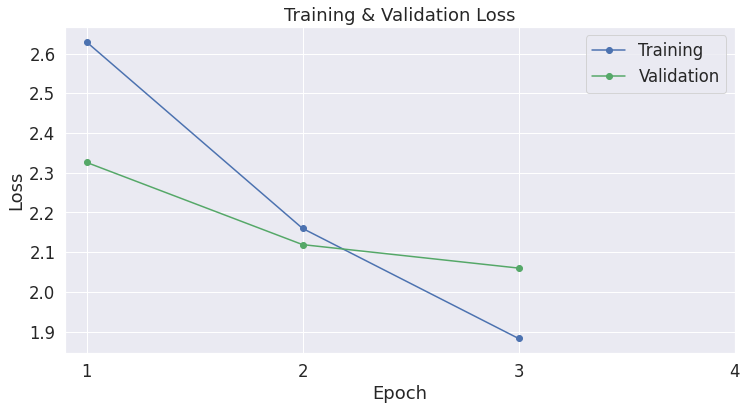

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import os

output_dir = '/content/gpt2-fa-poetry'
os.makedirs(output_dir, exist_ok=True)

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
configuration.save_pretrained(output_dir)
!cp /content/gpt2/tokenizer.json /content/gpt2-fa-poetry/

In [ ]:
from transformers import TFAutoModelForCausalLM


tf_model = TFAutoModelForCausalLM.from_pretrained("/content/gpt2-fa-poetry/", from_pt=True)
print(tf_model.summary())
tf_model.save_pretrained("/content/gpt2-fa-poetry-tf")
!cp /content/gpt2-fa-poetry-tf/tf_model.h5 /content/gpt2-fa-poetry
!rm -rf /content/gpt2-fa-poetry-tf

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.2.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'lm_head.weight', 'transformer.h.1.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.11.attn.masked_bias']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2LMHeadModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassifica

Model: "tfgp_t2lm_head_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transformer (TFGPT2MainLayer multiple                  118099200 
Total params: 118,099,200
Trainable params: 118,099,200
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
!zip -r gpt2-fa-poetry.zip gpt2-fa-poetry

  adding: gpt2-fa-poetry/ (stored 0%)
  adding: gpt2-fa-poetry/added_tokens.json (stored 0%)
  adding: gpt2-fa-poetry/config.json (deflated 51%)
  adding: gpt2-fa-poetry/merges.txt (deflated 74%)
  adding: gpt2-fa-poetry/tokenizer.json (deflated 79%)
  adding: gpt2-fa-poetry/tf_model.h5 (deflated 7%)
  adding: gpt2-fa-poetry/special_tokens_map.json (deflated 47%)
  adding: gpt2-fa-poetry/vocab.json (deflated 73%)
  adding: gpt2-fa-poetry/pytorch_model.bin (deflated 10%)
  adding: gpt2-fa-poetry/tokenizer_config.json (deflated 36%)


In [ ]:
import re


def generator(poet, max_length=128, num_return_sequences=3):
    model.eval()
    prompt = f"<s>{poet}<|startoftext|>"
    print(prompt)

    generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
    generated = generated.to(device)

    decoded_outputs = model.generate(
        generated,
        do_sample=True,
        top_k=50,
        max_length=max_length,
        top_p=0.95,
        num_return_sequences=num_return_sequences
    )


    outputs = []
    for i, output in enumerate(decoded_outputs):
        o = tokenizer.decode(output, skip_special_tokens=False)
        o = o.replace("<s>", "").replace("</s>", "")
        outputs.append(o)



    display.display(display.HTML("""
    <style>
    @import url("https://cdn.jsdelivr.net/gh/rastikerdar/vazir-font@v27.1.0/dist/font-face.css");

    table.xxx {
        margin-right: 15px;
        font-size: 14px;
        direction: rtl !important;
        width: 100%;
        display: flex;
    }
    table.xxx td {
        min-width: 300px !important;
        direction: rtl !important;
        text-align: right !important;
        font-family: "Vazir" !important;
    }
    </style>
    """.strip()))


    df = pd.DataFrame(outputs, columns=["generated"])
    df["generated"] = df["generated"].apply(lambda t: re.sub("\n+", "\n", t.replace("<sep>", "\n")))
    df["generated"] = df["generated"].apply(lambda t: "<p>" + t.replace("\n", "<br/>").replace("<|startoftext|>", "<br/>").strip() + "</p>")


    setup = {
        'border': 2,
        'show_dimensions': True,
        'escape': False,
        'justify': 'right',
        'classes': 'xxx'
    }
    display.display(display.HTML(df.to_html(**setup)))

In [ ]:
print("\n".join(poets))

رودکی
فردوسی
کسایی
ناصرخسرو
منوچهری
فرخی سیستانی
مسعود سعد سلمان
ابوسعید ابوالخیر
باباطاهر
فخرالدین اسعد گرگانی
اسدی توسی
هجویری
خیام
نظامی
عطار
سنایی
خاقانی
انوری
عبدالواسع جبلی
نصرالله منشی
مهستی گنجوی
باباافضل کاشانی
مولوی
سعدی
خواجوی کرمانی
عراقی
سیف فرغانی
حافظ
اوحدی
شیخ محمود شبستری
عبید زاکانی
امیرخسرو دهلوی
سلمان ساوجی
شاه نعمت‌الله ولی
جامی
هلالی جغتایی
وحشی
محتشم کاشانی
شیخ بهایی
عرفی
رضی‌الدین آرتیمانی
صائب تبریزی
فیض کاشانی
بیدل دهلوی
هاتف اصفهانی
فروغی بسطامی
قاآنی
ملا هادی سبزواری
پروین اعتصامی
ملک‌الشعرای بهار
شهریار
رهی معیری
اقبال لاهوری
خلیل‌الله خلیلی
شاطرعباس صبوحی
نیما یوشیج ( آوای آزاد )
احمد شاملو
سهراب سپهری
فروغ فرخزاد
سیمین بهبهانی
مهدی اخوان ثالث
محمدحسن بارق شفیعی
شیون فومنی
کامبیز صدیقی کسمایی
بهرام سالکی
عبدالقهّار عاصی
اِ لیـــار    (جبار محمدی )


In [ ]:
poet = poets[np.random.randint(0, len(poets))]
generator(poet, num_return_sequences=2)

<s>عطار<|startoftext|>


,generated
0,عطارآن روز که چشم می‌رباید گل بر اوچون ابر گریست اشک می‌بارد گل بر اوابرش می‌کند همی از ابر به یک جرعهابرست به صد رنگ زرد و سرخ بر او
1,عطارجانا چو به تو دسترسی داریم مابر بی نشانی تو جرسی داریم ماگر در گذری، به هیچ سر مویم نیستدر هیچ سری نیست کسی داریم ما
